# MODEL 1 : Random Forest Classifier

It loads a dataset from a CSV file named 'predicted.csv' into a pandas DataFrame called df.

Also separates Features (columns in the dataset) and Target Variable ('Predicted Degree'). The features are stored in a DataFrame X, and the target variable is stored in a Series y.

It also defines a list of column names that are categorical variables.
(Ex: Columns that have fixed set of values/choices like "Dedication_Hours_Per_Week" column has  Under 10 hours, 10 - 20 hours, Over 30 hours as values/choices)

In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score, classification_report
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [ ]:
# Load dataset
df = pd.read_csv('predicted.csv')

# Separate features and target variable ('Predicted Degree')
X = df.drop('Predicted Degree', axis=1)
y = df['Predicted Degree']

# Define categorical columns
categorical_columns = ['Hobbies', 'Skills', 'Interest', 'University', 'Dedication_Hours_Per_Week', 'Sports/Clubs', 'Choice_of_Selection', 'Course_Fee','Learning_Environment','Assessment', 'Desired_Industries']

# Data Preprocessing



*   It sets up a preprocessing pipeline using ColumnTransformer from scikit-learn. This pipeline applies one-hot encoding (OneHotEncoder) to the categorical columns and passes through any remaining columns (non-categorical) without any transformation. (Ex: Values of "Dedication_Hours_Per_Week" column such as  Under 10 hours, 10 - 20 hours, Over 30 hours will be assigned numerical values such as 0, 1 & 2)
*   Create a Pipeline with Preprocessing and Model: It creates a Pipeline from scikit-learn (combines the preprocessing steps & ML model into a single object)). The pipeline consists of two steps: preprocessing (OneHotEncoder) and the ML model (RandomForestClassifier). The pipeline ensures that the same preprocessing steps are applied to both the training and testing data.
*   Later the dataset is split into training and testing sets using train_test_split from scikit-learn. 80% of the data is used for training (X_train and y_train), and 20% is used for testing (X_test and y_test).

In [ ]:
# Preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='first'), categorical_columns)
    ],
    remainder='passthrough'
)

# Create a pipeline with preprocessing and the model
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model Training, Prediction & Evaluation

*   It fits the pipeline to the training data (X_train and y_train) using the fit method. Then, it uses the trained pipeline to make predictions on the testing data (X_test) using the predict method.
*   Thereafter it evaluates the performance of the model by comparing the predicted values (y_pred) with the actual values (y_test). It calculates the accuracy of the model using accuracy_score from scikit-learn and prints the accuracy score. Additionally, it prints a classification report, which includes metrics such as precision, recall, and F1-score, to provide a more detailed evaluation of the model's performance.

In [ ]:
# Train the model & make prediction from test set
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')
print(classification_report(y_test, y_pred))

Accuracy: 1.00
              precision    recall  f1-score   support

        Arts       1.00      1.00      1.00       153
     Science       1.00      1.00      1.00        47

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



# Model Export

This saves/exports the pipeline object (which contains both preprocessing steps and the trained model) into a file named 'random_forest_model.pkl'. This makes it easy to save trained models and preprocessing steps for later use, without having to retrain the model or redo preprocessing each time you want to use it.

In [ ]:
# Save the pipeline/model and preprocessing steps
import joblib
joblib.dump(pipeline, 'random_forest_model.pkl')

['random_forest_model.pkl']

# Model 2 : Gradient Boosting Classifier

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = 'response.csv'  # Update this path
data = pd.read_csv(file_path)

# Exploratory Data Analysis (EDA)



*   Initially, the column names in the dataset is renamed for better readability using the rename() function.


*   An initial exploratory data analysis (EDA) is performed to understand the data better. It prints the first few rows of the dataset using head() and provides summary statistics using describe().

In [ ]:
# Rename columns
data = data.rename(columns={
    'In which higher education institute do you currently pursue your education?': 'Institution',
    'What influenced you to select the institution you are currently pursing your degree at?': 'Influence',
    'On average, how many hours do you dedicate towards your studies? (weekly basis) ': 'Weekly Study Hours',
    'Do you engage in any sports?': 'Sports Engagement',
    'What is your career goal after having successfully completed your degree program?': 'Career Goal',
    'In your opinion, what are the non-job specific skills that is important to secure a respected job in the cooperate world? (Communication, Teamwork, etc...)': 'Non-Job Specific Skills',
    'Did you face difficulties in identifying which higher education pathway best suited your personality? ': 'Difficulties Faced',
    'Were you influenced by a third person when selecting your degree pathway or was it solely based on your choice?': 'Influence on Pathway Selection',
    'If you could go back in time, would you choose a different degree pathway?': 'Change Pathway',
    'If yes, why and what would your selection be on?': 'Reason for Change',
    'In your opinion, would a platform that could assist students in selecting their higher educational pathway be beneficial?': 'Opinion on Educational Platform',
    'I would highly appreciate your suggestions, comments or feedback (if any) on the proposed solution. ': 'Feedback',
    'What is the degree you are currently reading for?': 'Degree'
})

# Perform an initial exploratory data analysis (EDA)
data.head(), data.describe(include='all')

# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Data Visualization

* Two types of plots are created to visualize the data:
  1.   Count of Each Degree: A bar plot (countplot) showing the count of each degree.
  2.   Box Plots of Weekly Study Hours by Degree: Box plots showing the distribution of weekly study hours for each degree.

* Cross-tabulations are created using pd.crosstab() to analyze the relationship between different categorical variables.
    
* Two heatmaps are plotted to visualize the cross-tabulations:
  1.   Heatmap of Degree vs Sports Engagement: Shows the count of students engaged in sports for each degree.
  2.   Heatmap of Degree vs Institution: Shows the count of students in each institution for each degree.

***Explanation of Visualizations:***
- The count plot provides an overview of the distribution of students across different degrees.
- Box plots visualize the distribution of weekly study hours among students in different degree programs.
- Heatmaps help understand the relationship between degrees and other categorical variables such as sports engagement and institution.

***Interpretation:***
- Through these visualizations, one can analyze patterns and relationships within the dataset. For example, identifying which degrees have the highest and lowest counts, understanding study habits across different degrees, and exploring the distribution of students across different institutions.

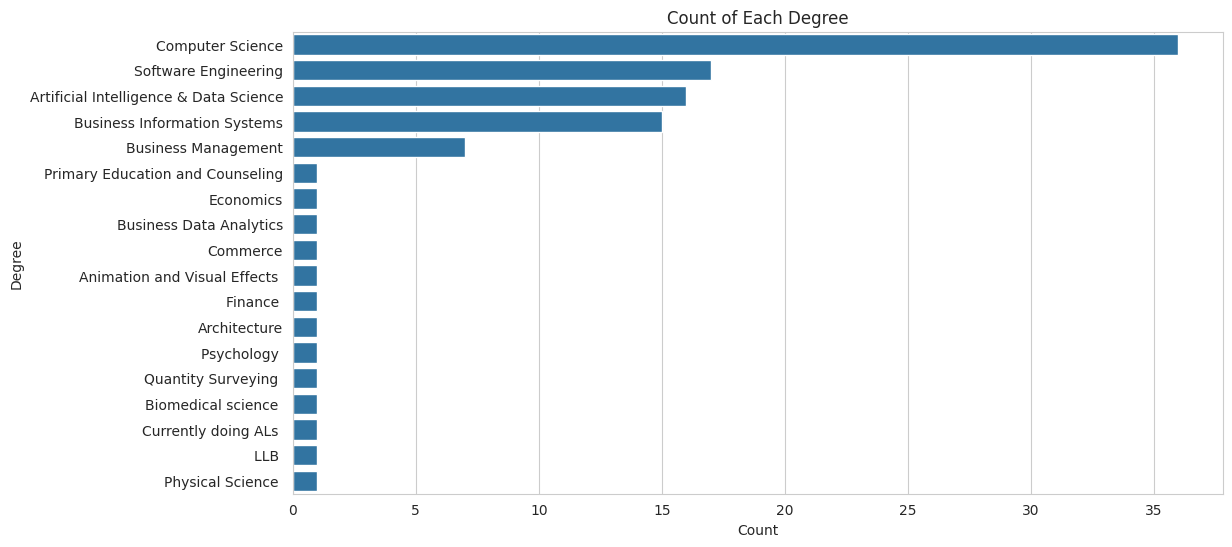

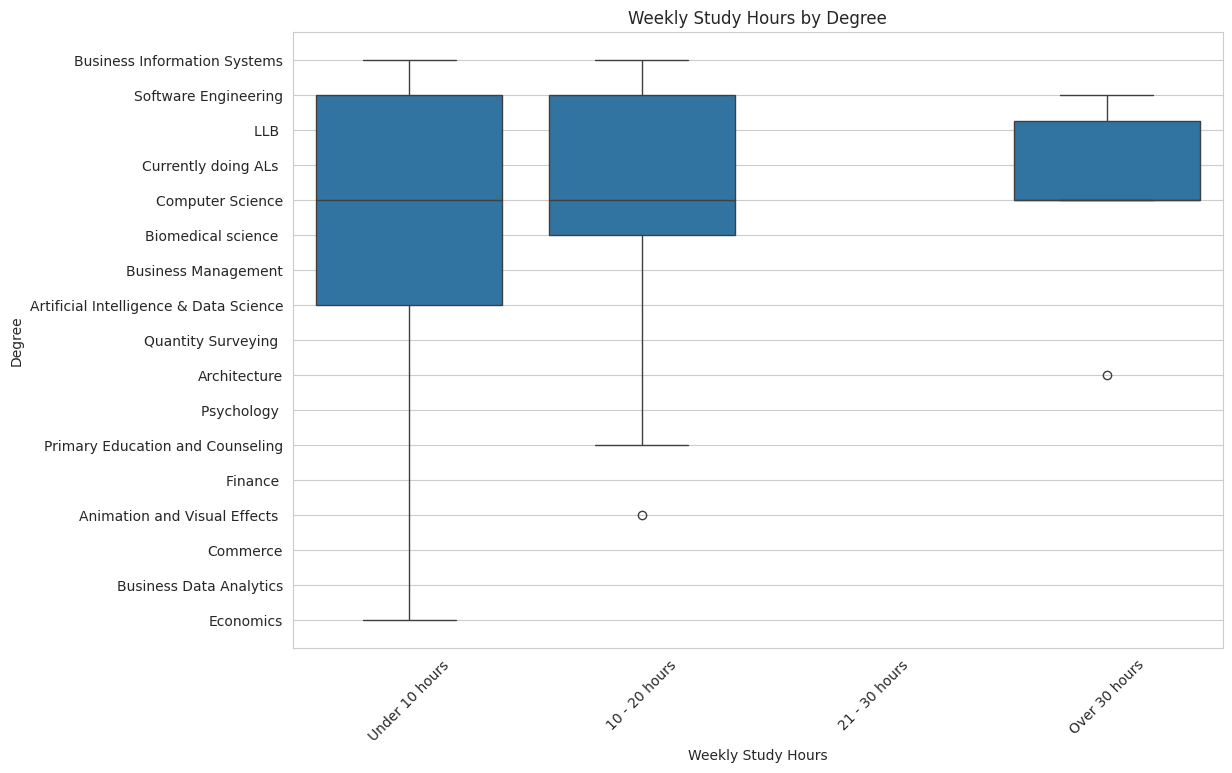

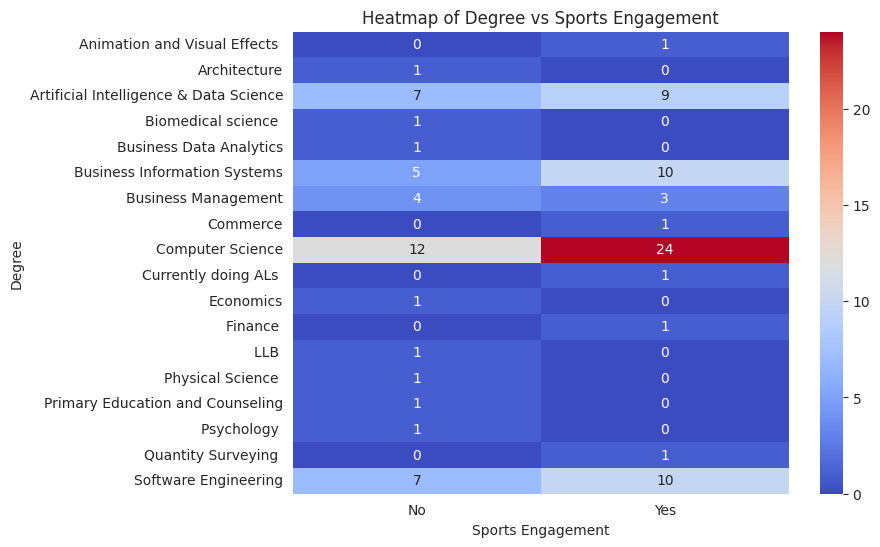

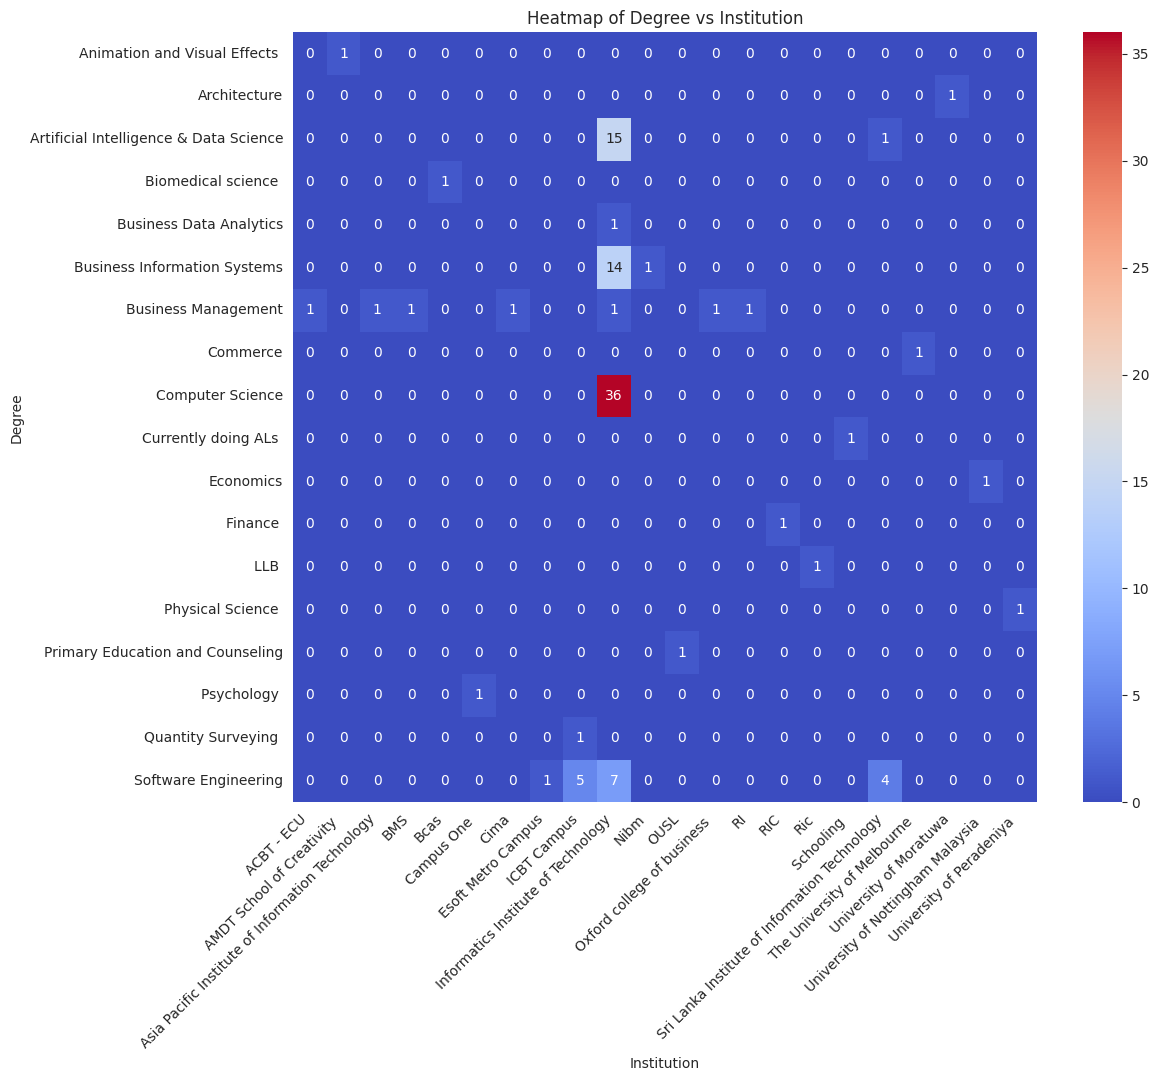

In [ ]:
# Plot 1: Count of each degree
plt.figure(figsize=(12, 6))
sns.countplot(y='Degree', data=data, order = data['Degree'].value_counts().index)
plt.title('Count of Each Degree')
plt.xlabel('Count')
plt.ylabel('Degree')
plt.show()

# Plot 2: Box plots of weekly study hours by degree
# We need to convert 'Weekly Study Hours' into an ordinal categorical type with a logical order
hours_order = ['Under 10 hours', '10 - 20 hours', '21 - 30 hours', 'Over 30 hours']
data['Weekly Study Hours'] = pd.Categorical(data['Weekly Study Hours'], categories=hours_order, ordered=True)

plt.figure(figsize=(12, 8))
sns.boxplot(x='Weekly Study Hours', y='Degree', data=data)
plt.title('Weekly Study Hours by Degree')
plt.xlabel('Weekly Study Hours')
plt.ylabel('Degree')
plt.xticks(rotation=45)
plt.show()

# Cross-tabulations
cross_tab_sports_degree = pd.crosstab(data['Degree'], data['Sports Engagement'])
cross_tab_institution_degree = pd.crosstab(data['Degree'], data['Institution'])

# Heatmap of Degree vs Sports Engagement
plt.figure(figsize=(8, 6))
sns.heatmap(cross_tab_sports_degree, annot=True, cmap='coolwarm', fmt='d')
plt.title('Heatmap of Degree vs Sports Engagement')
plt.ylabel('Degree')
plt.xlabel('Sports Engagement')
plt.show()

# Heatmap of Degree vs Institution
plt.figure(figsize=(12, 10))
sns.heatmap(cross_tab_institution_degree, annot=True, cmap='coolwarm', fmt='d')
plt.title('Heatmap of Degree vs Institution')
plt.ylabel('Degree')
plt.xlabel('Institution')
plt.xticks(rotation=45, ha='right')
plt.show()

# Data Cleansing

Removing Unnecessary Columns:
- It defines a list called columns_to_drop, which contains the names of columns to be dropped from the DataFrame.
- Using list comprehension, it checks if each column in columns_to_drop exists in the DataFrame and drops them if they do.

Removing Single-Type Responses:
- It removes responses with only one type of answer for each feature, excluding the target variable. This is done to remove rows with missing or homogeneous data.
- dropna(thresh=2) removes rows with less than 2 non-NA/null values. Since the target variable is expected to have only one type of answer, it's excluded from this check.

Removing Outliers:
- It identifies numerical columns in the DataFrame and calculates the first quartile (Q1), third quartile (Q3), and interquartile range (IQR) for each numerical column.
- Using the IQR method, it defines a range for identifying outliers and removes rows containing outliers for numerical columns.

In [ ]:
# Check the column names in the DataFrame
print(data.columns)

# Adjust the columns_to_drop list accordingly
columns_to_drop = ['Timestamp', 'Email Address', 'Career Goal', 'Reason for Change', 'Feedback', 'Influence on Pathway Selection']

# Remove specified columns if they exist in the DataFrame
data = data.drop(columns=[col for col in columns_to_drop if col in data.columns])

# Remove responses with only one type of answer for each feature (excluding the target variable)
data_no_single_type_responses = data.dropna(thresh=2)

# Remove outliers for numerical columns
numerical_columns = data_no_single_type_responses.select_dtypes(include=['number']).columns
Q1 = data_no_single_type_responses[numerical_columns].quantile(0.25)
Q3 = data_no_single_type_responses[numerical_columns].quantile(0.75)
IQR = Q3 - Q1
data_no_outliers = data_no_single_type_responses[~((data_no_single_type_responses[numerical_columns] < (Q1 - 1.5 * IQR)) | (data_no_single_type_responses[numerical_columns] > (Q3 + 1.5 * IQR))).any(axis=1)]

# Enlarge the dataset
data_enlarged = pd.concat([data_no_outliers] * 2, ignore_index=True)

Index(['Timestamp', 'Email Address', 'Institution', 'Influence',
       'Weekly Study Hours', 'Sports Engagement', 'Career Goal',
       'Non-Job Specific Skills', 'Difficulties Faced',
       'Influence on Pathway Selection', 'Change Pathway', 'Reason for Change',
       'Opinion on Educational Platform', 'Feedback', 'Degree'],
      dtype='object')


In [ ]:
# Calculate the mode (most repeated degree)
mode_degree = data_enlarged['Degree'].mode()
print("Most Repeated Degree:", mode_degree)

# Count of each unique degree
degree_counts = data_enlarged['Degree'].value_counts()
print("\nCount of Each Degree:")
print(degree_counts)

# Summary statistics for numerical columns
summary_stats = data_enlarged.describe()
print("\nSummary Statistics:")
print(summary_stats)

# Proportion of each degree
degree_proportion = data_enlarged['Degree'].value_counts(normalize=True)
print("\nProportion of Each Degree:")
print(degree_proportion)

Most Repeated Degree: 0    Computer Science
Name: Degree, dtype: object

Count of Each Degree:
Degree
Computer Science                          72
Software Engineering                      34
Artificial Intelligence & Data Science    32
Business Information Systems              30
Business Management                       14
Primary Education and Counseling           2
Economics                                  2
Business Data Analytics                    2
Commerce                                   2
Animation and Visual Effects               2
Finance                                    2
Architecture                               2
Psychology                                 2
Quantity Surveying                         2
Biomedical science                         2
Currently doing ALs                        2
LLB                                        2
Physical Science                           2
Name: count, dtype: int64

Summary Statistics:
                                Instituti

# Data Preprocessing
Preprocessing:
- It defines the categorical features based on the remaining columns after dropping unnecessary ones.
- One-hot encoding is applied to the categorical features using OneHotEncoder within a ColumnTransformer. (Ex: Values of "Dedication_Hours_Per_Week" column such as  Under 10 hours, 10 - 20 hours, Over 30 hours will be assigned numerical values such as 0, 1 & 2)
- The ColumnTransformer allows different transformations to be applied to different columns.

Model Pipeline:
- It defines a pipeline consisting of preprocessing (preprocessor) and a Gradient Boosting Classifier (classifier).

In [ ]:
# Define features and target from the enlarged dataset
X = data_enlarged.drop('Degree', axis=1)
y = data_enlarged['Degree']

# Preprocessing: Define which columns are categorical
categorical_features = X.columns.tolist()

# Apply OneHotEncoder to categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ],
    remainder='passthrough'  # Let other types of features pass through
)

# Define the model pipeline
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', GradientBoostingClassifier(random_state=42))
])

# Model Training & Evaluation

Grid Search for Hyperparameter Tuning:
- It sets up a parameter grid (param_grid) containing different hyperparameters for the Gradient Boosting Classifier.
- The GridSearchCV object is initialized with the pipeline, parameter grid, and cross-validation settings.
- fit() method is called to run the grid search, which exhaustively searches over the parameter grid to find the best combination of hyperparameters.

Evaluation:
- The best parameters found by grid search are stored in best_params.
- The model's accuracy is evaluated using the best parameters on the test set, and the accuracy score is stored in accuracy.

In [ ]:
# Setup the parameter grid for GridSearchCV
param_grid = {
    'classifier__n_estimators': [200, 300],
    'classifier__learning_rate': [0.05, 0.1],
    'classifier__max_depth': [3, 5]
}

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and run grid search again (hyper parameter tuning)
grid_search = GridSearchCV(pipeline, param_grid, cv=5, verbose=2, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Output the best parameters and the corresponding accuracy
best_params = grid_search.best_params_
y_pred = grid_search.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

best_params, accuracy

Fitting 5 folds for each of 8 candidates, totalling 40 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


({'classifier__learning_rate': 0.1,
  'classifier__max_depth': 3,
  'classifier__n_estimators': 300},
 0.8333333333333334)

# Model Prediction

- First, a new DataFrame (new_data) is created containing sample values for each feature to obtain a test prediction. The features include that used during model training, and an empty column for the degree, which will be predicted.
- The new data (X_new) is preprocessed using the preprocessor defined earlier in the pipeline.
- The predict() method is used to make predictions on the preprocessed new data (X_new). The predictions (y_pred_new) represent the predicted degrees for the new data.

In [ ]:
import pandas as pd

# Define the data
new_data = pd.DataFrame({
    'Institution': ['Informatics Institute of Technology'],
    'Influence': ['Curriculum and Teaching Style'],
    'Weekly Study Hours': ['Over 30 hours'],
    'Sports Engagement': ['No'],
    'Non-Job Specific Skills': ['Communication and professionalism'],
    'Difficulties Faced': ['Yes'],
    'Change Pathway': ['Yes'],
    'Opinion on Educational Platform': ['Yes'],
    'Degree': ['']  # This will be predicted
})

# Preprocess the new data using the preprocessor defined in the pipeline
X_new = new_data

# Make predictions on the new data
y_pred_new = grid_search.predict(X_new)
print("Predicted Degree:", y_pred_new[0])

Predicted Degree: Software Engineering


# Model Performance Evaluation
- Confusion Matrix : Provides a tabular summary of the number of correct and incorrect predictions by the model.
- Classification Report : A classification report provides metrics such as precision, recall, F1-score, and support for each class. It gives a comprehensive overview of the model's performance across all classes.
- Calibration Curve : This curve plots the predicted probabilities against the true probabilities. It helps assess whether the model's predicted probabilities are well-calibrated and can be interpreted as confidence levels. The x-axis represents the mean predicted probability for each bin, and the y-axis represents the fraction of positives (true positives) for each bin. The diagonal dashed line represents perfect calibration. The closer the plotted points are to this diagonal line, the better the calibration of your model.
- Precision-Recall Curve: Similar to ROC curves, precision-recall curves can be used for multi-class classification by treating each class as positive and all other classes as negative. It shows the trade-off between precision and recall for different thresholds.

Confusion Matrix:
[[ 6  0  0  0  0  0  0  0  0  0]
 [ 0  2  0  4  0  0  0  0  0  0]
 [ 0  0  4  0  0  0  0  0  0  2]
 [ 0  0  1 14  0  0  0  0  0  0]
 [ 0  0  0  0  1  0  0  0  0  0]
 [ 0  0  0  0  0  1  0  0  0  0]
 [ 0  0  0  0  0  0  1  0  0  0]
 [ 0  0  0  0  0  0  0  1  0  0]
 [ 0  0  0  0  0  0  0  0  1  0]
 [ 0  0  0  0  0  0  0  0  0  4]]

Classification Report:
                                        precision    recall  f1-score   support

Artificial Intelligence & Data Science       1.00      1.00      1.00         6
          Business Information Systems       1.00      0.33      0.50         6
                   Business Management       0.80      0.67      0.73         6
                      Computer Science       0.78      0.93      0.85        15
                             Economics       1.00      1.00      1.00         1
                              Finance        1.00      1.00      1.00         1
      Primary Education and Counseling       1.00      1.00      1

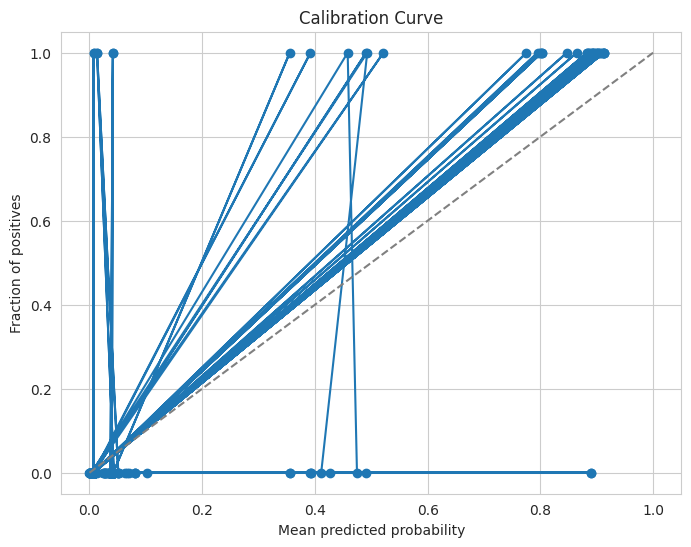

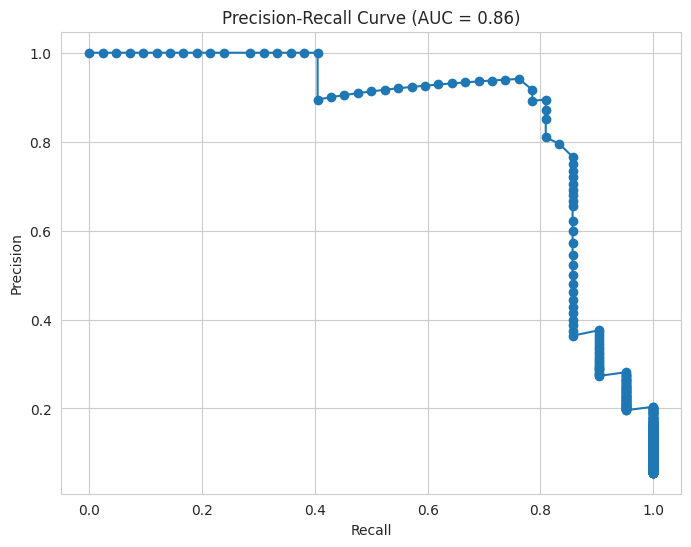

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import label_binarize

# Predict class labels
y_pred = grid_search.predict(X_test)

# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# Generate classification report
cr = classification_report(y_test, y_pred)
print("\nClassification Report:")
print(cr)

# Encode the target labels to binary
y_train_encoded = label_binarize(y_train, classes=label_encoder.classes_)
y_test_encoded = label_binarize(y_test, classes=label_encoder.classes_)

# Apply probability calibration to the best model obtained from grid search
calibrated_model = CalibratedClassifierCV(grid_search.best_estimator_, method='sigmoid', cv='prefit')
calibrated_model.fit(X_train, y_train_encoded)

# Predict probabilities
y_prob = calibrated_model.predict_proba(X_test)

# Compute calibration curve
prob_true = y_test_encoded.ravel()
prob_pred = y_prob.ravel()

# Plot the calibration curve
plt.figure(figsize=(8, 6))
plt.plot(prob_pred, prob_true, marker='o', linestyle='-')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('Mean predicted probability')
plt.ylabel('Fraction of positives')
plt.title('Calibration Curve')
plt.grid(True)
plt.show()

from sklearn.metrics import precision_recall_curve, auc

# Compute Precision-Recall curve
precision, recall, _ = precision_recall_curve(y_test_encoded.ravel(), y_prob.ravel())

# Compute area under the curve (AUC) for Precision-Recall curve
auc_score = auc(recall, precision)

# Plot Precision-Recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, marker='o', linestyle='-')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title(f'Precision-Recall Curve (AUC = {auc_score:.2f})')
plt.grid(True)
plt.show()


# Model Export

This saves/exports the trained GridSearchCV object (grid_search) including the pipeline object (the best estimator as well as any hyperparameters selected during the grid search process) into a file named 'model.pkl'. This makes it easy to save trained models and preprocessing steps for later use, without having to retrain the model or redo preprocessing each time you want to use it.

In [ ]:
import joblib
joblib.dump(grid_search, 'model.pkl')

['model.pkl']